In [25]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_google_genai import GoogleGenerativeAI
from dotenv import load_dotenv

In [3]:
load_dotenv()

True

In [4]:
model = GoogleGenerativeAI(model="gemini-1.5-pro")

In [14]:
class BatsmanState(TypedDict):
    runs:int
    balls: int
    fours: int
    sixes: int
    
    sr: float
    bpb: float # balls per boundary
    bp: float # boundaries per ball
    summary : str

In [19]:
def cal_sr(state: BatsmanState) -> BatsmanState:
    sr = (state['runs'] / state['balls']) * 100
    return {'sr': sr}

def cal_bpb(state: BatsmanState) -> BatsmanState:
    bpb = state['balls'] / (state['fours'] + state['sixes'])
    return {'bpb':bpb}

def cal_bp(state: BatsmanState) -> BatsmanState:
    bp= (((state['fours']*4) + (state['sixes']*6))/state['runs'])*100
    return {'bp': bp}

def summary(state: BatsmanState) -> str:
    state['summary'] = (
        f"Batsman Summary:\n"
        f"Runs: {state['runs']}\n"
        f"Balls: {state['balls']}\n"
        f"Fours: {state['fours']}\n"
        f"Sixes: {state['sixes']}\n"
        f"Strike Rate: {state['sr']:.2f}\n"
        f"Balls per Boundary: {state['bpb']:.2f}\n"
        f"Balls per Run: {state['bp']:.2f}"
    )
    return state

In [20]:
graph = StateGraph(BatsmanState)

graph.add_node('cal_sr',cal_sr)
graph.add_node('cal_bpb',cal_bpb)
graph.add_node('cal_bp',cal_bp) 
graph.add_node('summary',summary)

graph.add_edge(START, 'cal_sr')
graph.add_edge(START, 'cal_bpb')
graph.add_edge(START, 'cal_bp')

graph.add_edge('cal_sr', 'summary')
graph.add_edge('cal_bpb', 'summary')
graph.add_edge('cal_bp', 'summary')

graph.add_edge('summary', END)

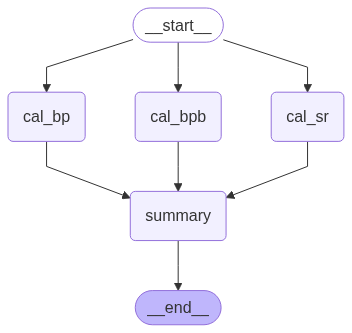

In [21]:
workflow = graph.compile()
workflow

In [22]:
inital_state = {'runs':123,'balls': 100, 'fours': 10, 'sixes': 5}
workflow.invoke(inital_state)

{'runs': 123,
 'balls': 100,
 'fours': 10,
 'sixes': 5,
 'sr': 123.0,
 'bpb': 6.666666666666667,
 'bp': 56.91056910569105,
 'summary': 'Batsman Summary:\nRuns: 123\nBalls: 100\nFours: 10\nSixes: 5\nStrike Rate: 123.00\nBalls per Boundary: 6.67\nBalls per Run: 56.91'}